I. REGRESSION TECHNIQUES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/drive/My Drive/assignment_02/tips_data.csv')
print(data.head())
print(data.info())

# Data Preprocessing
# Remove any missing values if present
data = data.dropna()

# Encode categorical variables if any exist
data = pd.get_dummies(data, drop_first=True)

# Define the features and target variable
X = data.drop('tip', axis=1)  # tip being the target variable we drop tip from data
y = data['tip']

# Split the data into training and testing sets ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [ ]:
# function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

In [ ]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
mae_lr, rmse_lr, r2_lr = evaluate_model(linear_model, X_test, y_test)

In [ ]:
# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
mae_ridge, rmse_ridge, r2_ridge = evaluate_model(ridge_model, X_test, y_test)

In [ ]:
# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
mae_lasso, rmse_lasso, r2_lasso = evaluate_model(lasso_model, X_test, y_test)

In [ ]:
# 4. Decision Tree Regression
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
mae_tree, rmse_tree, r2_tree = evaluate_model(tree_model, X_test, y_test)

In [ ]:
# 5. Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
mae_rf, rmse_rf, r2_rf = evaluate_model(forest_model, X_test, y_test)

In [ ]:
# 6. Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
mae_svr, rmse_svr, r2_svr = evaluate_model(svr_model, X_test, y_test)

In [ ]:

# 7. K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
mae_knn, rmse_knn, r2_knn = evaluate_model(knn_model, X_test, y_test)


In [ ]:
# Compile evaluation results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN'],
    'MAE': [mae_lr, mae_ridge, mae_lasso, mae_tree, mae_rf, mae_svr, mae_knn],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_tree, rmse_rf, rmse_svr, rmse_knn],
    'R2 Score': [r2_lr, r2_ridge, r2_lasso, r2_tree, r2_rf, r2_svr, r2_knn]
})

print("Model Evaluation Results:")
print(results)



Model Evaluation Results:
               Model       MAE      RMSE  R2 Score
0  Linear Regression  0.667133  0.838664  0.437302
1   Ridge Regression  0.666538  0.837107  0.439389
2   Lasso Regression  0.637484  0.768670  0.527307
3      Decision Tree  0.742688  0.992119  0.212541
4      Random Forest  0.755716  0.958995  0.264246
5                SVR  0.567986  0.729641  0.574089
6                KNN  0.718857  0.936148  0.298886


In [ ]:
# Identify important factors (using Random Forest for interpretability)
feature_importances = pd.Series(forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances from Random Forest:")
print(feature_importances)



Feature Importances from Random Forest:
total_bill    0.767043
smoker_Yes    0.069417
size          0.058045
day_Sat       0.030292
day_Sun       0.025223
sex_Male      0.025187
time_Lunch    0.012975
day_Thur      0.011818
dtype: float64


In [ ]:
# Insights for Management
print("\nInsights for Management:")
print("1. Key factors impacting tips: ", feature_importances.head(3).index.tolist())
print("2. Best model in terms of R2 score and RMSE:", results.loc[results['R2 Score'].idxmax(), 'Model'])
print("3. Consider tailoring service based on identified factors to optimize tip outcomes.")


Insights for Management:
1. Key factors impacting tips:  ['total_bill', 'smoker_Yes', 'size']
2. Best model in terms of R2 score and RMSE: SVR
3. Consider tailoring service based on identified factors to optimize tip outcomes.


Explanation of Key Steps:

*  Model Evaluation: This code evaluates each model based on Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and
R sqaure score.

*  Feature Importance: Random Forest’s feature importance helps reveal which variables most impact tip amounts, useful for providing insights.
* Insights: Management insights are generated from the model’s performance and key predictors, allowing actionable strategies for improving customer service and tips.










# **II. Question:**
 1. Visual and Statistical Analysis to check for linear relationships.
2. Model Selection Based on Trend Analysis to apply a suitable regression method.

In [ ]:
# Import necessary libraries for visualization and statistical testing
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

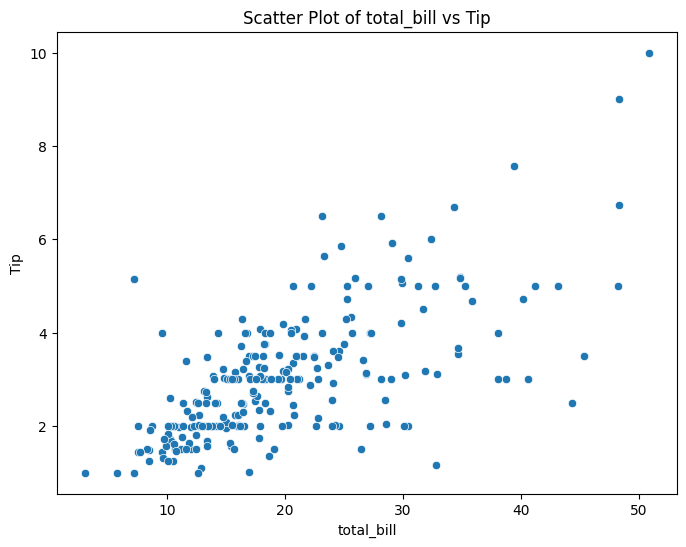

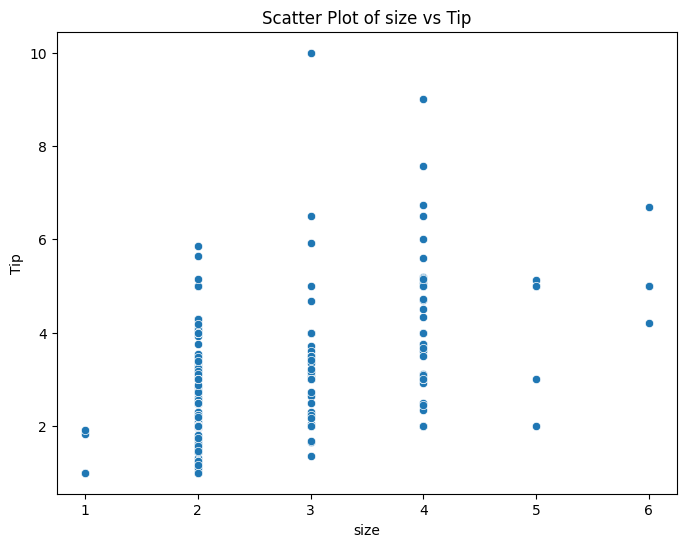

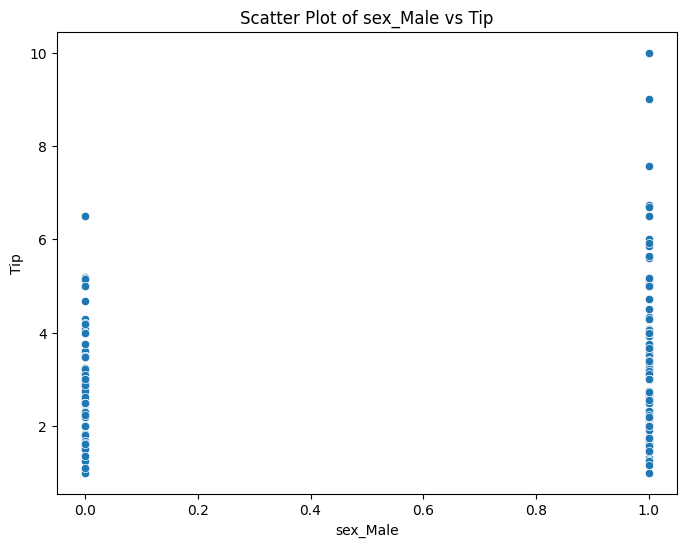

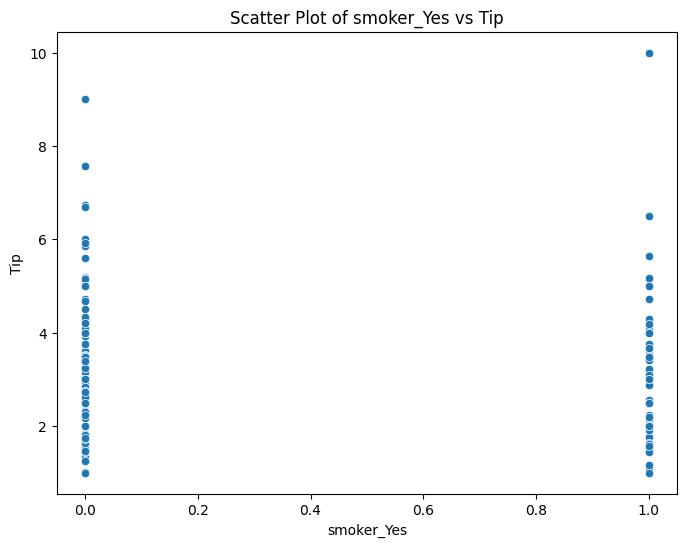

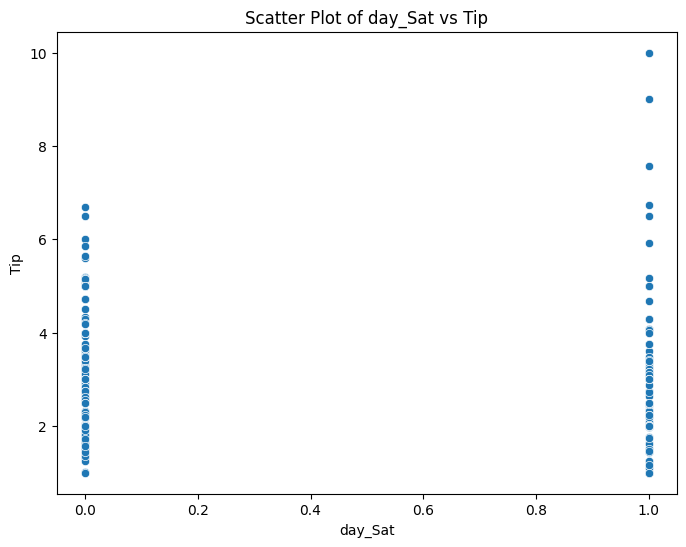

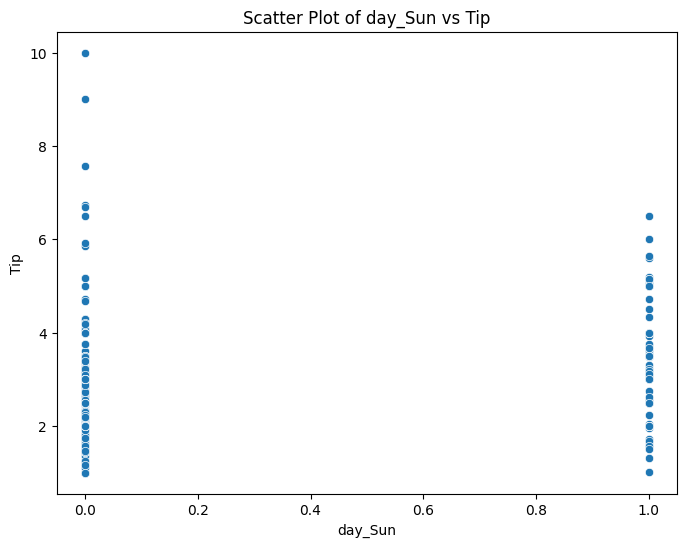

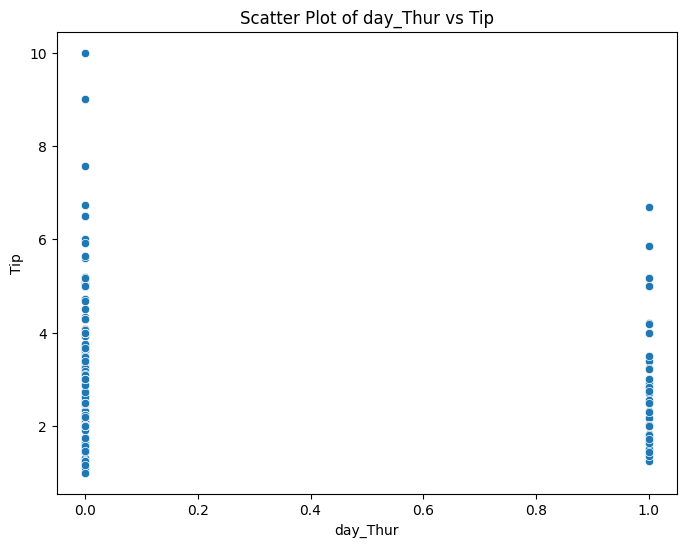

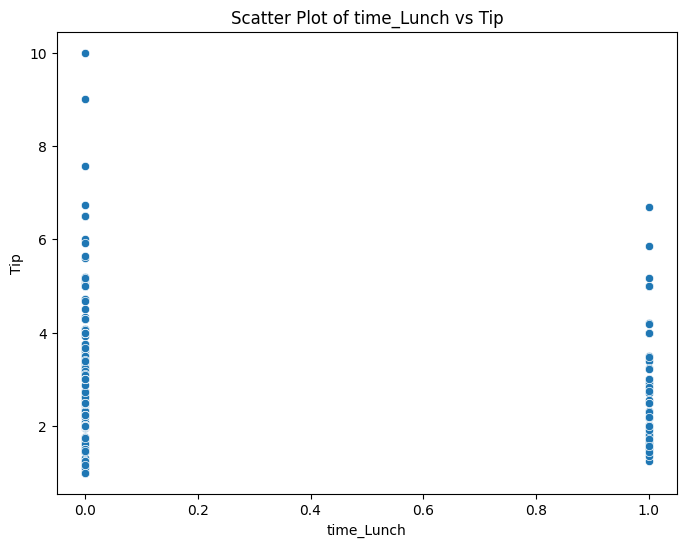

In [ ]:
# Scatter Plot
# Visualizing the relationship between 'tip' and main numerical features in the dataset
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[column], y=y)
    plt.title(f'Scatter Plot of {column} vs Tip')
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.show()

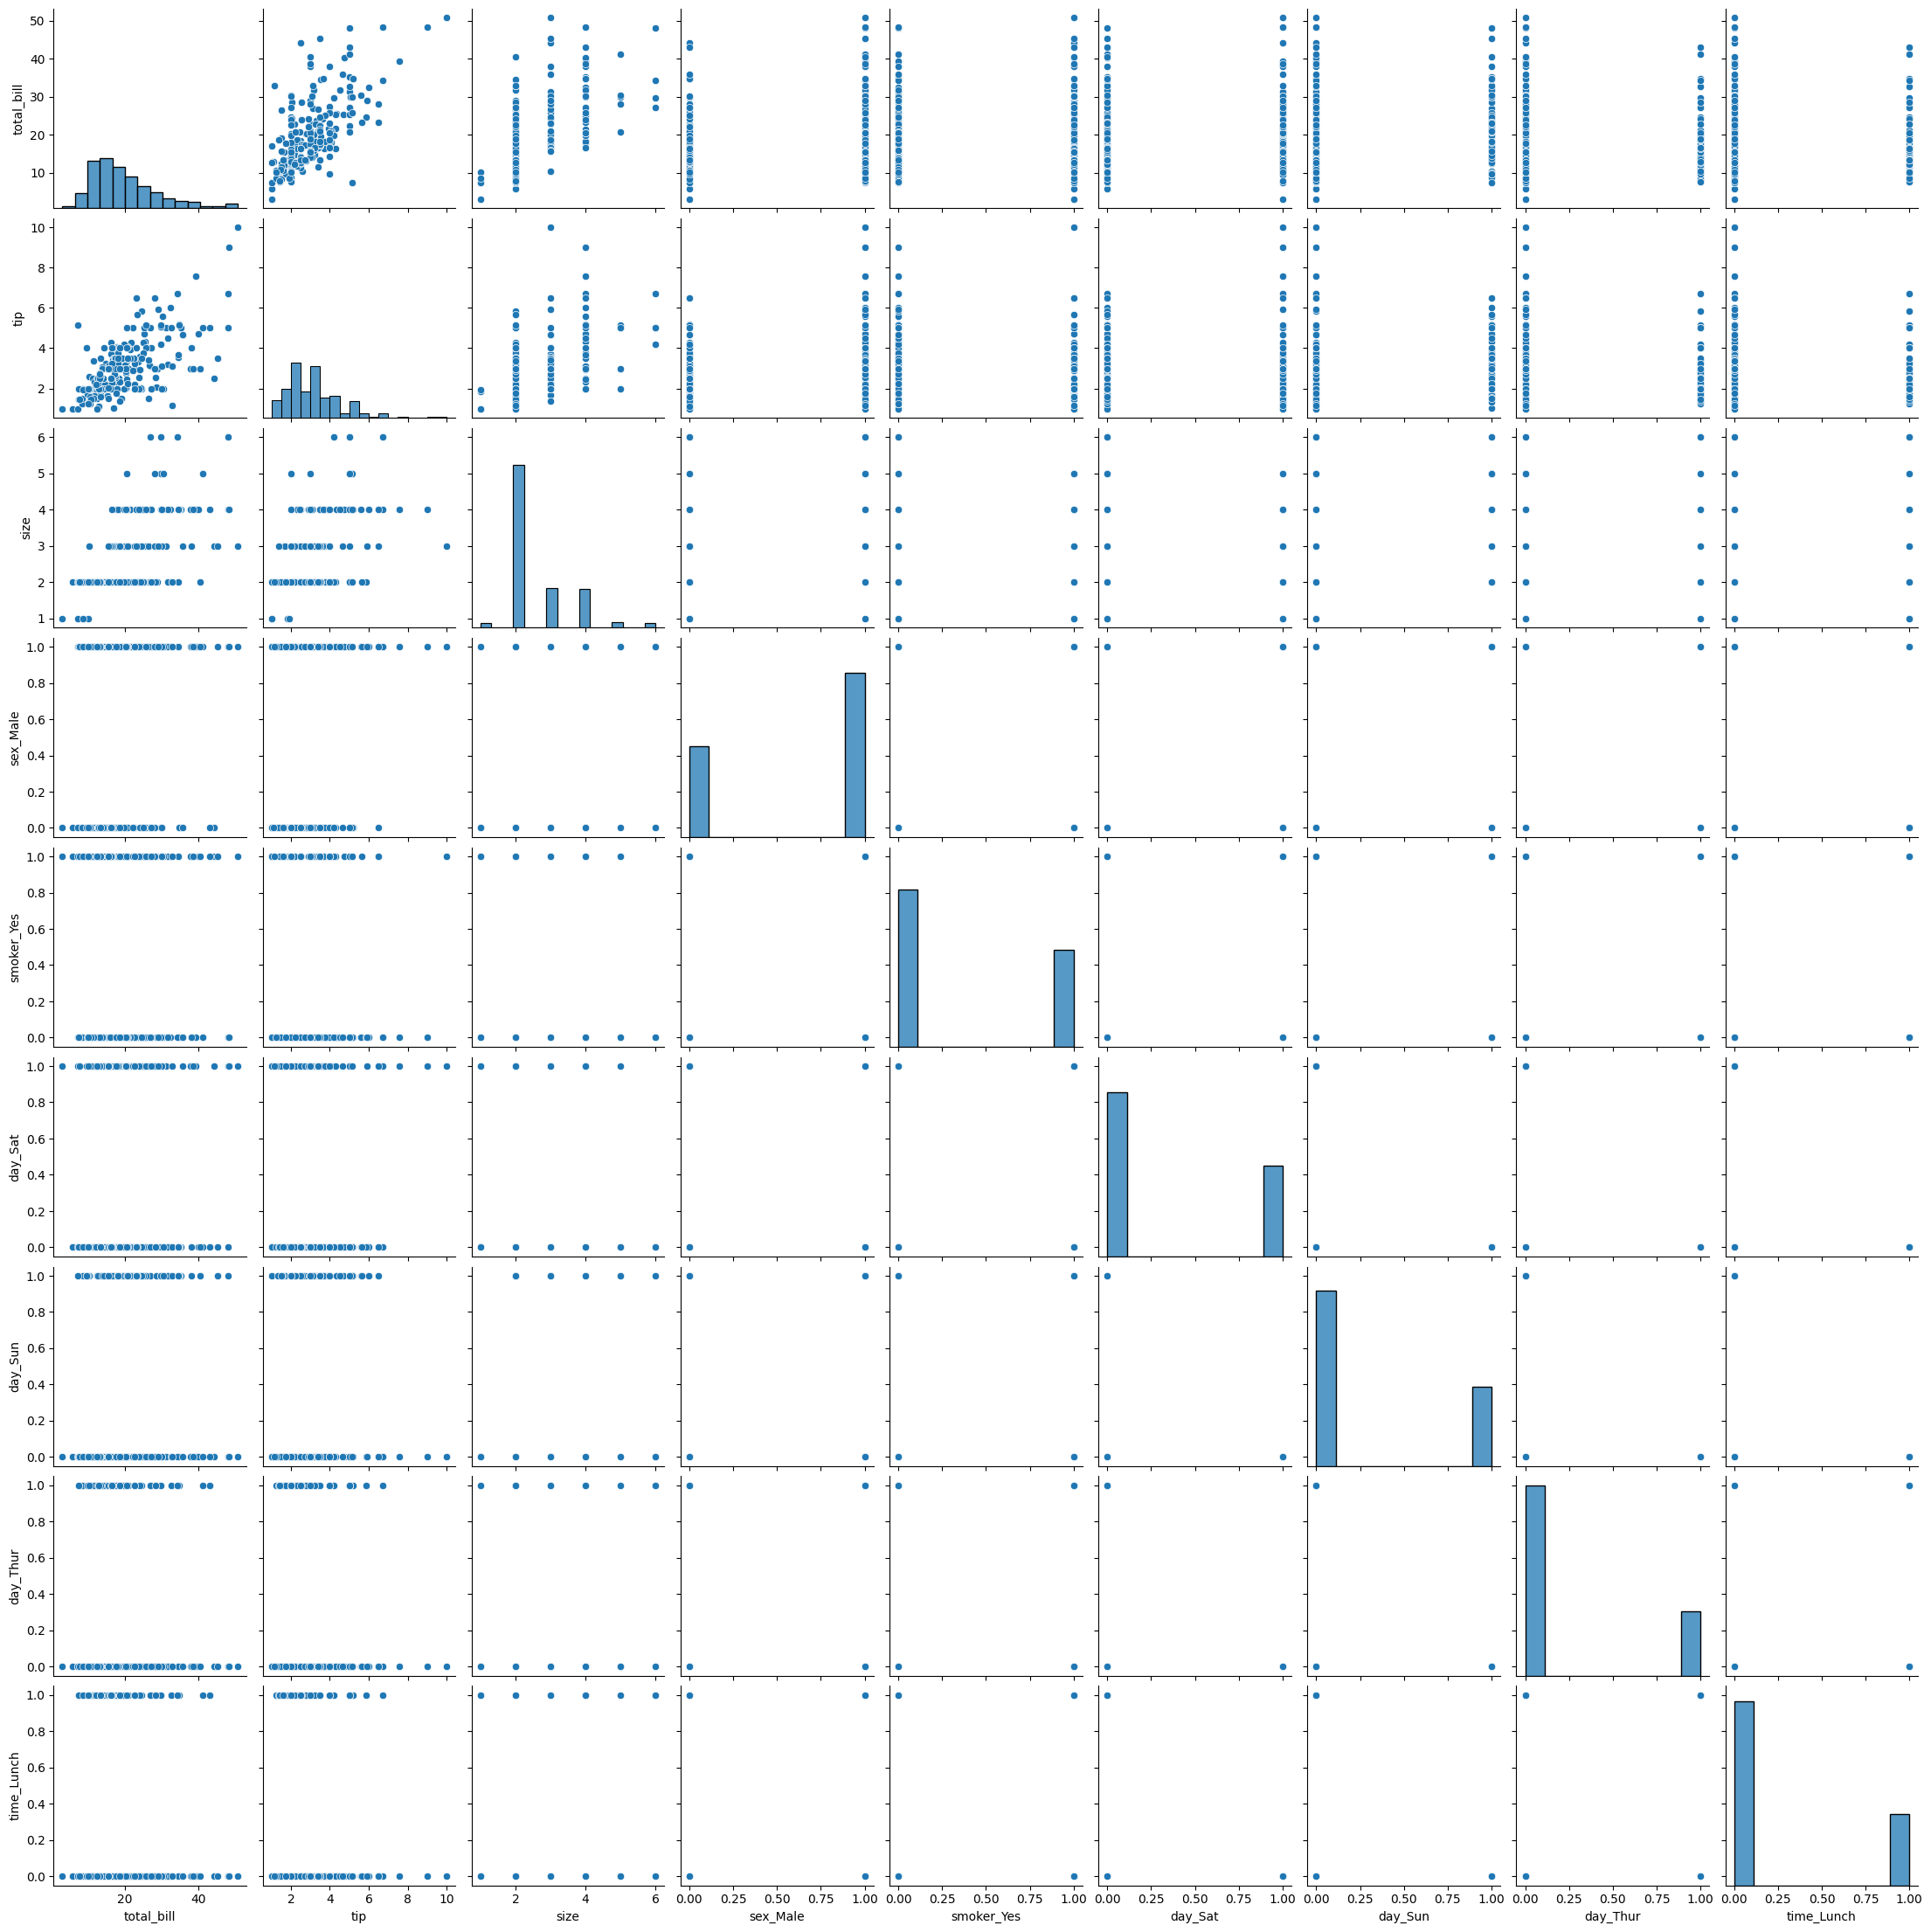

In [ ]:
# Pair Plot for Multiple Features

sns.pairplot(data)
plt.show()


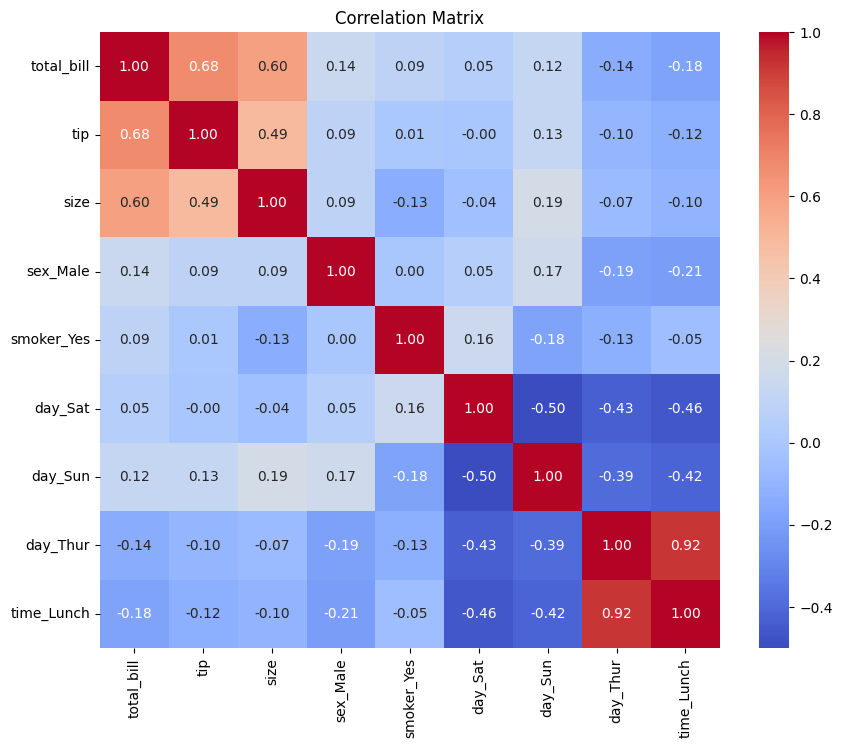

In [ ]:
# Correlation Matrix (Heatmap)
# Checking correlation between all numerical features including 'tip'
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Error fitting OLS model: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Data follows a linear trend. Using Linear Regression.

Model Performance:
Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.84
R² Score: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


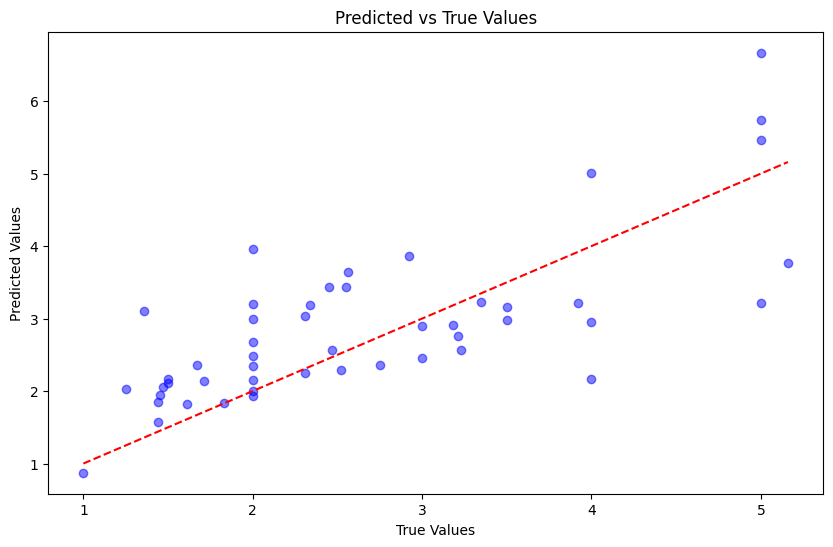

In [ ]:

# Statistical Tests for Linearity using Rainbow Test
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('/content/drive/My Drive/assignment_02/tips_data.csv')

# Preparing X and y
X = data.drop('tip', axis=1)  #'tip' is the target variable
y = data['tip']

# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with any NaN values
X = X.dropna()
y = y[X.index]

# Add a constant to X
X_with_constant = sm.add_constant(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, test_size=0.2, random_state=42)

# Step 1: Perform the Rainbow Test for Linearity
try:
    ols_model = sm.OLS(y_train, X_train).fit()
    rainbow_statistic, rainbow_p_value = linear_rainbow(ols_model)
    print(f"Rainbow Test p-value: {rainbow_p_value:.4f}")
except ValueError as e:
    print("Error fitting OLS model:", e)

# Step 2: Select Model Based on Linearity
if rainbow_p_value > 0.05:# if rainbow test >0.5 choose linear regression otherwise flexible model like random forest
    print("Data follows a linear trend. Using Linear Regression.")
    model = LinearRegression()
else:
    print("Data does not follow a strict linear trend. Using Random Forest Regression.")
    model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the selected model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Plot residuals to visualize model fit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()


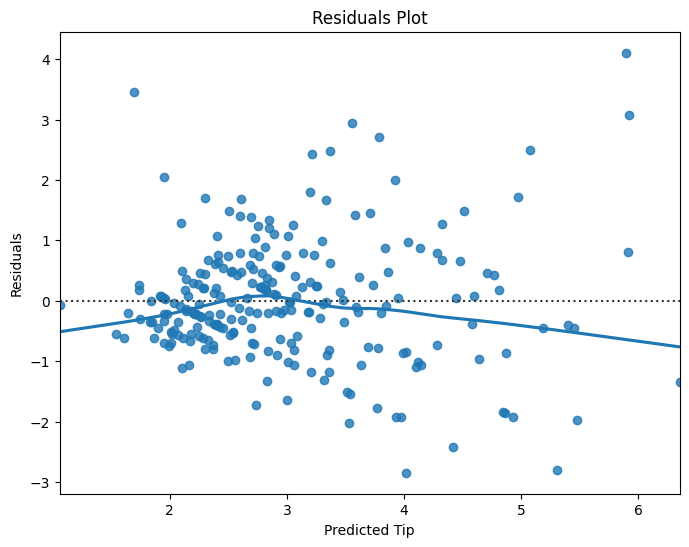

In [ ]:
# Explicitly convert X_with_constant and y to numeric dtypes before fitting the model
X_with_constant = X_with_constant.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X_with_constant = X_with_constant.astype(float).fillna(0)
y = y.astype(float).fillna(0)


# Fit the OLS model before making predictions
ols_model = sm.OLS(y, X_with_constant).fit()  # This line was missing

# Residuals Plot
# Checking if residuals exhibit any non-linearity
y_pred = ols_model.predict(X_with_constant)
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

Interpretation of Step 1: **"Visual and Statistical Analysis to check for linear relationshipS"** Results:-

•	Scatter Plots and Pair Plots: These help visually determine if the relationships between predictors and the tip amount seem linear or not.

•	Correlation Matrix: This shows the correlation coefficients, where values close to 1 or -1 suggest a strong linear relationship.

•	Rainbow Test: This statistical test checks for linearity. A high p-value (typically > 0.05) suggests a linear relationship, while a low p-value suggests non-linearity.

•	Residuals Plot: In a linear relationship, residuals should be randomly distributed around zero. Patterns or trends in residuals indicate non-linearity.

•	Line Plot: This is more applicable for time-series data but can be used for features that vary over time.






Step 2: Applying Suitable Regression Method and Checking Accuracy

In [ ]:
# checking for linearity is indicated, proceed with linear regression
if rainbow_p_value > 0.05:
    print("Applying Linear Regression as the data seems to follow a linear trend.")
    model = LinearRegression()
else:
    # Otherwise, use a more flexible model like Random Forest
    print("Applying Random Forest Regression as the data does not follow a strict linear trend.")
    model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the selected model
model.fit(X_train, y_train)

# Evaluate model performance
mae, rmse, r2 = evaluate_model(model, X_test, y_test)

print(f"\nModel Performance with Selected Regression:")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


Applying Linear Regression as the data seems to follow a linear trend.

Model Performance with Selected Regression:
Mean Absolute Error: 0.6671331480264893
Root Mean Squared Error: 0.8386635807900631
R2 Score: 0.43730181943482493


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Explanation



*  Model Selection: Based on the visual and statistical analysis, the Rainbow Test result helps us decide between linear and non-linear regression models.

*  Evaluation: The selected model is then trained, and prediction accuracy is evaluated using MAE, RMSE, and R square score, which help in determining the model’s reliability.

